In [21]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from matplotlib import pyplot

In [22]:
file = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal length","sepal width","petal length","petal width","class"]

In [23]:
df = pd.read_csv(file, names=names)
df.dropna(inplace =True)
df.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.tail(10)

,sepal length,sepal width,petal length,petal width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
X = np.array(df.drop(["class"],1),dtype=np.float64)
y = np.array(df["class"])

In [26]:
#this dataset has string you trun the calss into a number 
le = preprocessing.LabelEncoder()
le.fit(y)
le.transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [27]:
scaler = StandardScaler().fit(X)
X= scaler.transform(X)


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 5)

In [29]:
clf =MLPClassifier()
clf.fit(X_train,y_train)

C:\Users\User\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [30]:
score = clf.score(X_train,y_train)
print(score)

0.975


In [31]:
example = np.array([4.4,3.3,1.4,0.5]).reshape(1,-1)
pre = clf.predict(example)
print(pre)



['Iris-versicolor']


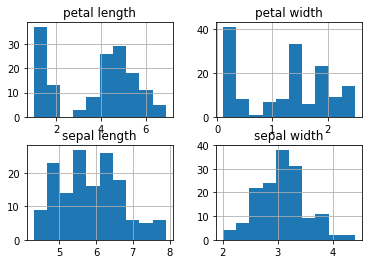

In [32]:
df.hist()
pyplot.show()

In [33]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.groupby("class").mean()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [35]:
df.groupby("sepal length").mean()

,sepal width,petal length,petal width
sepal length,,,
4.3,3.000000,1.100000,0.100000
4.4,3.033333,1.333333,0.200000
4.5,2.300000,1.300000,0.300000
4.6,3.325000,1.325000,0.225000
4.7,3.200000,1.450000,0.200000
4.8,3.180000,1.580000,0.200000
4.9,2.866667,2.283333,0.533333
5.0,3.120000,1.840000,0.430000
5.1,3.477778,1.722222,0.400000
